In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
import os
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv("spotify_data.csv")

In [3]:
df.head()

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0


In [4]:
df

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


In [5]:
df.isnull().sum()

Songs & Artist    0
Streams           0
Daily             2
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df['Artist']=df['Songs & Artist'].apply(lambda s:s.split("-")[0])
df['Song']=df['Songs & Artist'].apply(lambda s:s.split("-")[1])
df.drop(columns=['Songs & Artist'],inplace=True)

In [8]:
df=df[['Song','Artist','Streams','Daily']]

In [9]:
df.head()

,Song,Artist,Streams,Daily
0,Blinding Lights,The Weeknd,4463658617,1619447.0
1,Shape of You,Ed Sheeran,4018102402,1001507.0
2,Someone You Loved,Lewis Capaldi,3588673578,1506961.0
3,As It Was,Harry Styles,3544187311,1611374.0
4,Sunflower,Post Malone,3518744128,1337404.0


In [10]:
df2=df.groupby("Artist").agg({"Streams":"mean"}).reset_index().sort_values(by="Streams",ascending=False)

<Axes: title={'center': 'TOP 10 ARTISTS BASED ON STREAMING COUNTS'}, xlabel='Artist', ylabel='Streams'>

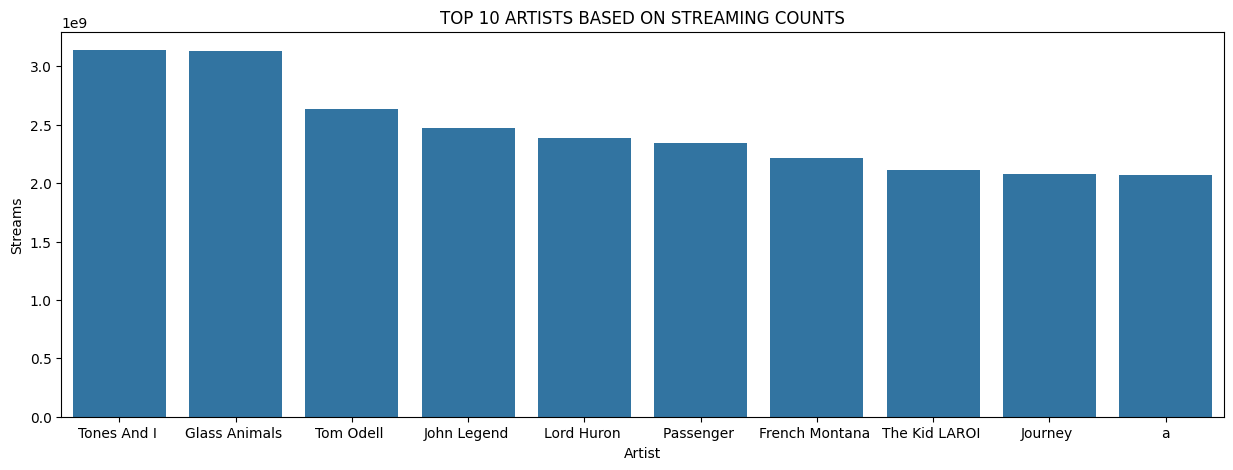

In [11]:
df2=df.groupby("Artist").agg({"Streams":"mean"}).reset_index().sort_values(by="Streams",ascending=False)
plt.figure(figsize=(15,5))
plt.title("TOP 10 ARTISTS BASED ON STREAMING COUNTS")
sns.barplot(x='Artist',y='Streams',data=df2.head(10))

<Axes: title={'center': 'TOP 10 ARTISTS BASED ON DAILY COUNTS'}, xlabel='Artist', ylabel='Daily'>

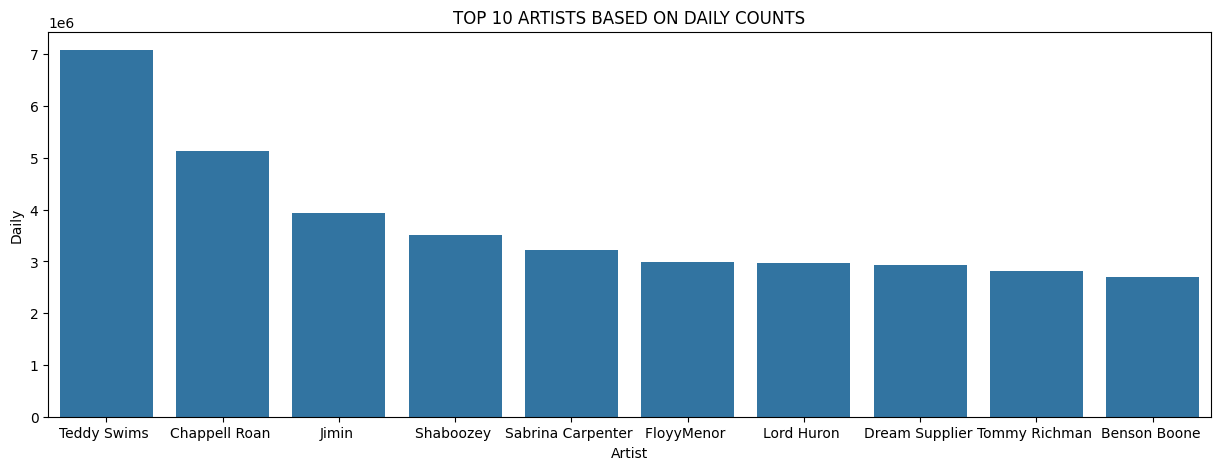

In [12]:
df2=df.groupby("Artist").agg({"Daily":"mean"}).reset_index().sort_values(by="Daily",ascending=False)
plt.figure(figsize=(15,5))
plt.title("TOP 10 ARTISTS BASED ON DAILY COUNTS")
sns.barplot(x='Artist',y='Daily',data=df2.head(10))

In [13]:
df[['Daily','Streams']].corr()

,Daily,Streams
Daily,1.000000,0.443207
Streams,0.443207,1.000000


<Axes: xlabel='Streams', ylabel='Daily'>

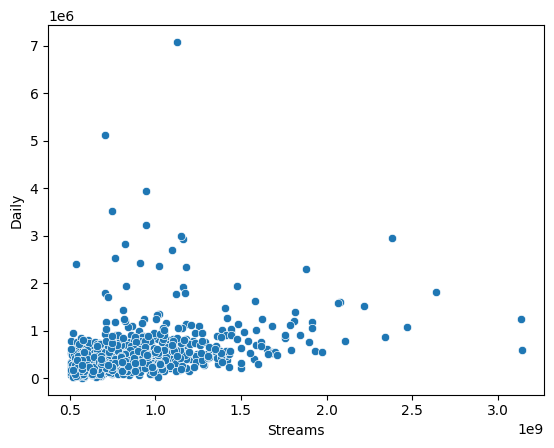

In [14]:
sns.scatterplot(x='Streams',y='Daily',data=df.groupby("Artist").agg({'Streams':'mean','Daily':'mean'}).reset_index(),markers=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for top 10 most streamed songs
plt.figure(figsize=(10, 6))
sns.barplot(x='Streams', y='Song', data=df, hue='Artist', dodge=False)

plt.title('Top 10 Most Streamed Songs Globally (in Millions)')
plt.xlabel('Total Streams (in millions)')
plt.ylabel('Song')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot to visualize the relationship between total streams and daily streams
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Streams', y='Daily', data=df, hue='Artist')

plt.title('Daily Streams vs Total Streams (in Millions)')
plt.xlabel('Total Streams (in millions)')
plt.ylabel('Daily Streams (in millions)')
plt.show()

In [ ]:
# Plot a histogram to visualize the distribution of total streams
plt.figure(figsize=(8, 5))
sns.histplot(df['Streams'], bins=20, kde=True)

plt.title('Distribution of Total Streams (in Millions)')
plt.xlabel('Total Streams (in millions)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
streams_mean = df['Streams'].mean()
streams_median = df['Streams'].median()
streams_mode = df['Streams'].mode()[0]  # Mode can return multiple values, so we take the first

# Mean, Median, and Mode for 'Daily' column
daily_mean = df['Daily'].mean()
daily_median = df['Daily'].median()
daily_mode = df['Daily'].mode()[0]  # Mode can return multiple values, so we take the first

# Display the results
print(f"Streams - Mean: {streams_mean:.2f} million, Median: {streams_median:.2f} million, Mode: {streams_mode:.2f} million")
print(f"Daily Streams - Mean: {daily_mean:.2f} million, Median: {daily_median:.2f} million, Mode: {daily_mode:.2f} million")